# EDA on model performance
*by Max*

In this notebook we'll look at the model performance and plot it for each of our models.

In [7]:
# set the directory of the data
# depending on colab or vscode environment
on_colabs = False
import sys
if on_colabs:
  from google.colab import drive
  drive.mount("/content/drive")
  DATA_DIR = "/content/drive/MyDrive/Radiant_Earth_Spot_Crop/data"
  PLOT_DIR = "/content/drive/MyDrive/Radiant_Earth_Spot_Crop/plots"
  sys.path.append("/content/drive/MyDrive/Radiant_Earth_Spot_Crop/src")
else:
  DATA_DIR = "../data"
  PLOT_DIR = "../plots"

  sys.path.append("../src/")

In [8]:
# import the needed modules
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import plotting modules and set the style
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(context="notebook", style="darkgrid", palette="crest", font="helvetica")
cmap = sns.color_palette("crest", 6) # six colors are created this way
sns.set(rc = {"figure.dpi":300})
sns.set(rc = {"figure.figsize":(6,3)})
sns.set(font_scale = 0.5)

In [33]:
model_accuracy = {
    "model":["Baseline: Random Forest", "Baseline: Random Forest", "Random Forest", "Random Forest", "XGBClassifier", "XGBClassifier", "Neural Network", "Neural Network"],
    "data_typ":["train", "validation", "train", "validation", "train", "validation", "train", "validation"],
    "accuracy": [0.991, 0.417, 0.997, 0.751, 1.000, 0.817, 0.631, 0.630]
}
accuracy_data = pd.DataFrame(model_accuracy)
accuracy_data

,model,data_typ,accuracy
0,Baseline: Random Forest,train,0.991
1,Baseline: Random Forest,validation,0.417
2,Random Forest,train,0.997
3,Random Forest,validation,0.751
4,XGBClassifier,train,1.000
5,XGBClassifier,validation,0.817
6,Neural Network,train,0.631
7,Neural Network,validation,0.630


In [35]:
model_performance = {
    "model":["Baseline: Random Forest", "Baseline: Random Forest", "Random Forest", "Random Forest", "XGBClassifier", "XGBClassifier"],
    "data_typ":["train", "validation", "train", "validation", "train", "validation"],
    "accuracy": [0.991, 0.417, 0.997, 0.751, 1.000, 0.817],
    "f1_score": [0.990, 0.324, 0.997, 0.747, 1.000, 0.816],
    "cross-entropy": [0.328, 4.048, 0.163, 0.871, 0.018, 0.555]
}
performance_data = pd.DataFrame(model_performance)
performance_data

,model,data_typ,accuracy,f1_score,cross-entropy
0,Baseline: Random Forest,train,0.991,0.990,0.328
1,Baseline: Random Forest,validation,0.417,0.324,4.048
2,Random Forest,train,0.997,0.997,0.163
3,Random Forest,validation,0.751,0.747,0.871
4,XGBClassifier,train,1.000,1.000,0.018
5,XGBClassifier,validation,0.817,0.816,0.555


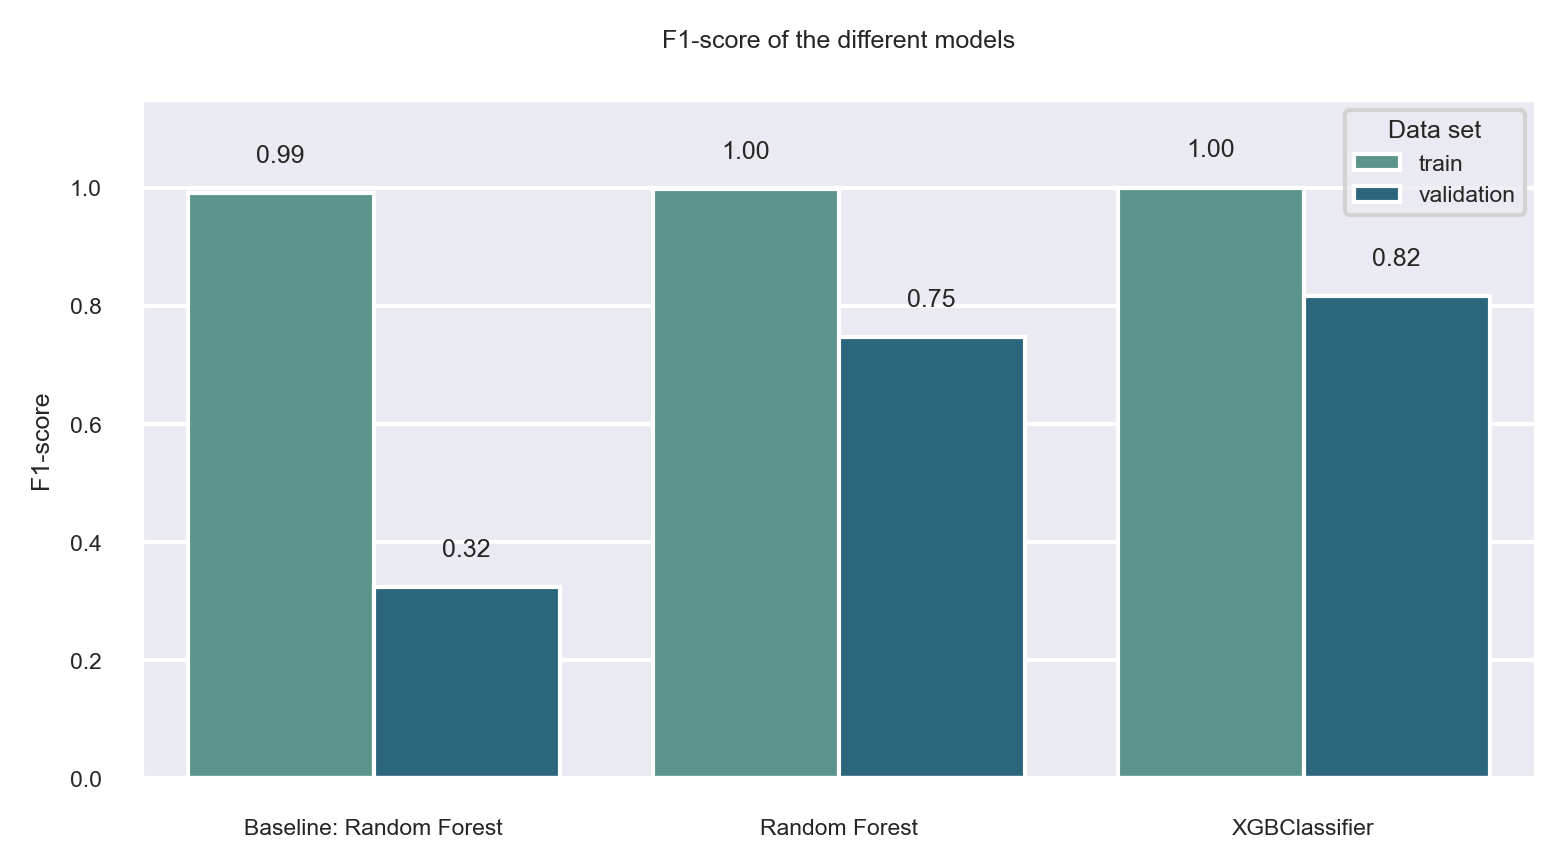

In [36]:
# create a color map for the two data types
cmap = sns.color_palette("crest", 2)
ax = sns.barplot(data=model_performance, x="model", y="f1_score", hue="data_typ", palette=cmap)

# do the annotation on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# set chart labels
ax.set_title('F1-score of the different models\n')
ax.set_xlabel('')
ax.set_ylabel('F1-score')

# set the ticket labels
plt.legend(title='Data set')
plt.yticks(rotation=0) 
plt.ylim(0, 1.15)
plt.xticks(rotation=0, horizontalalignment='center')

# display the bar chart of the label accuracies
plt.show()

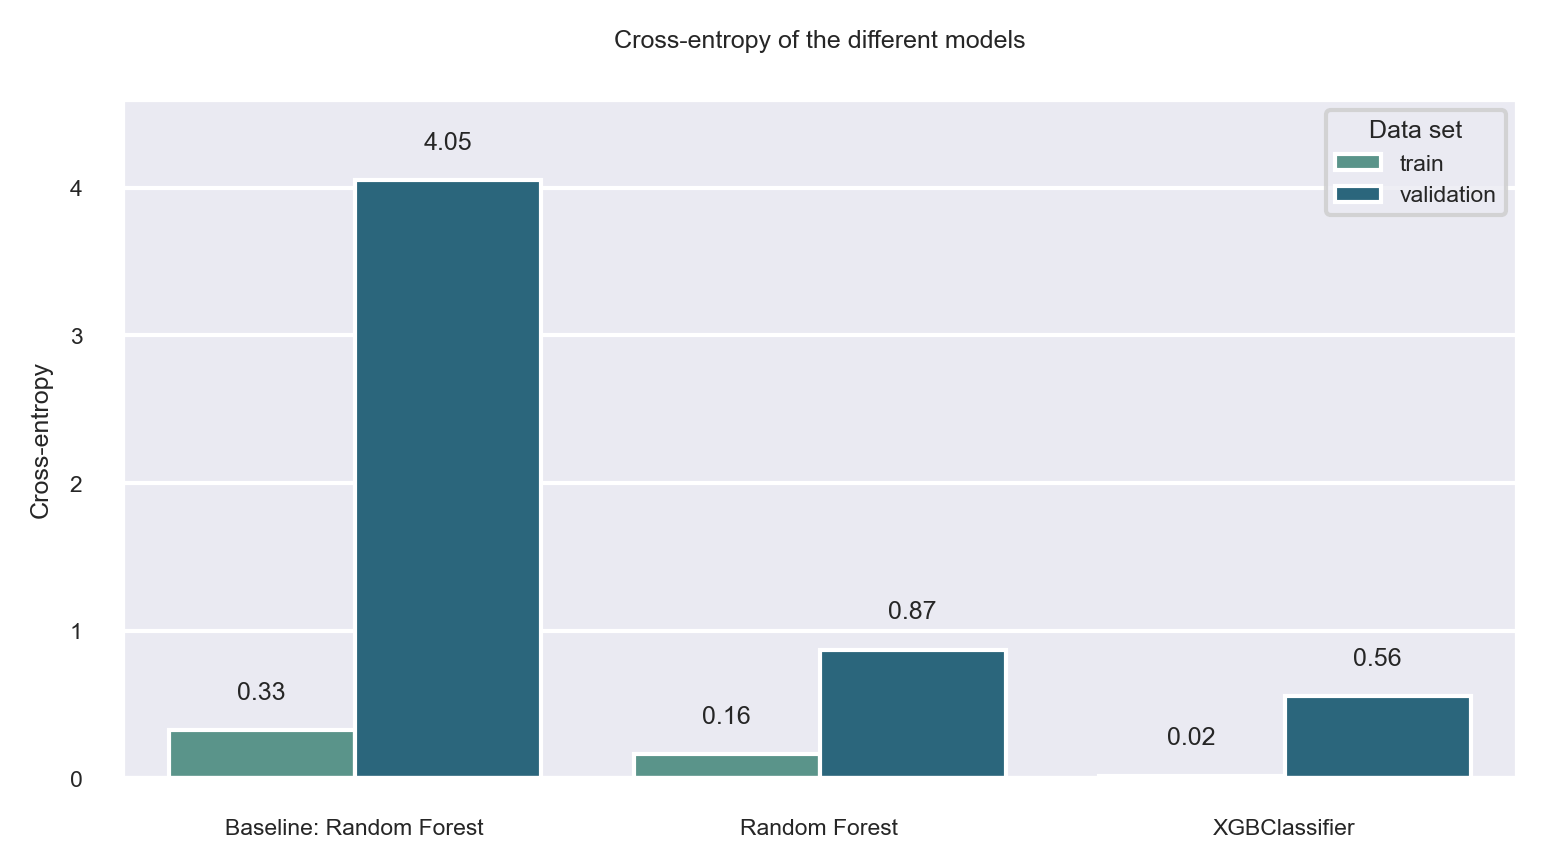

In [41]:
# create a color map for the two data types
cmap = sns.color_palette("crest", 2)
ax = sns.barplot(data=model_performance, x="model", y="cross-entropy", hue="data_typ", palette=cmap)

# do the annotation on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# set chart labels
ax.set_title('Cross-entropy of the different models\n')
ax.set_xlabel('')
ax.set_ylabel('Cross-entropy')

# set the ticket labels
plt.legend(title='Data set')
plt.yticks(rotation=0) 
plt.ylim(0, 4.6)
plt.xticks(rotation=0, horizontalalignment='center')

# display the bar chart of the label accuracies
plt.show()

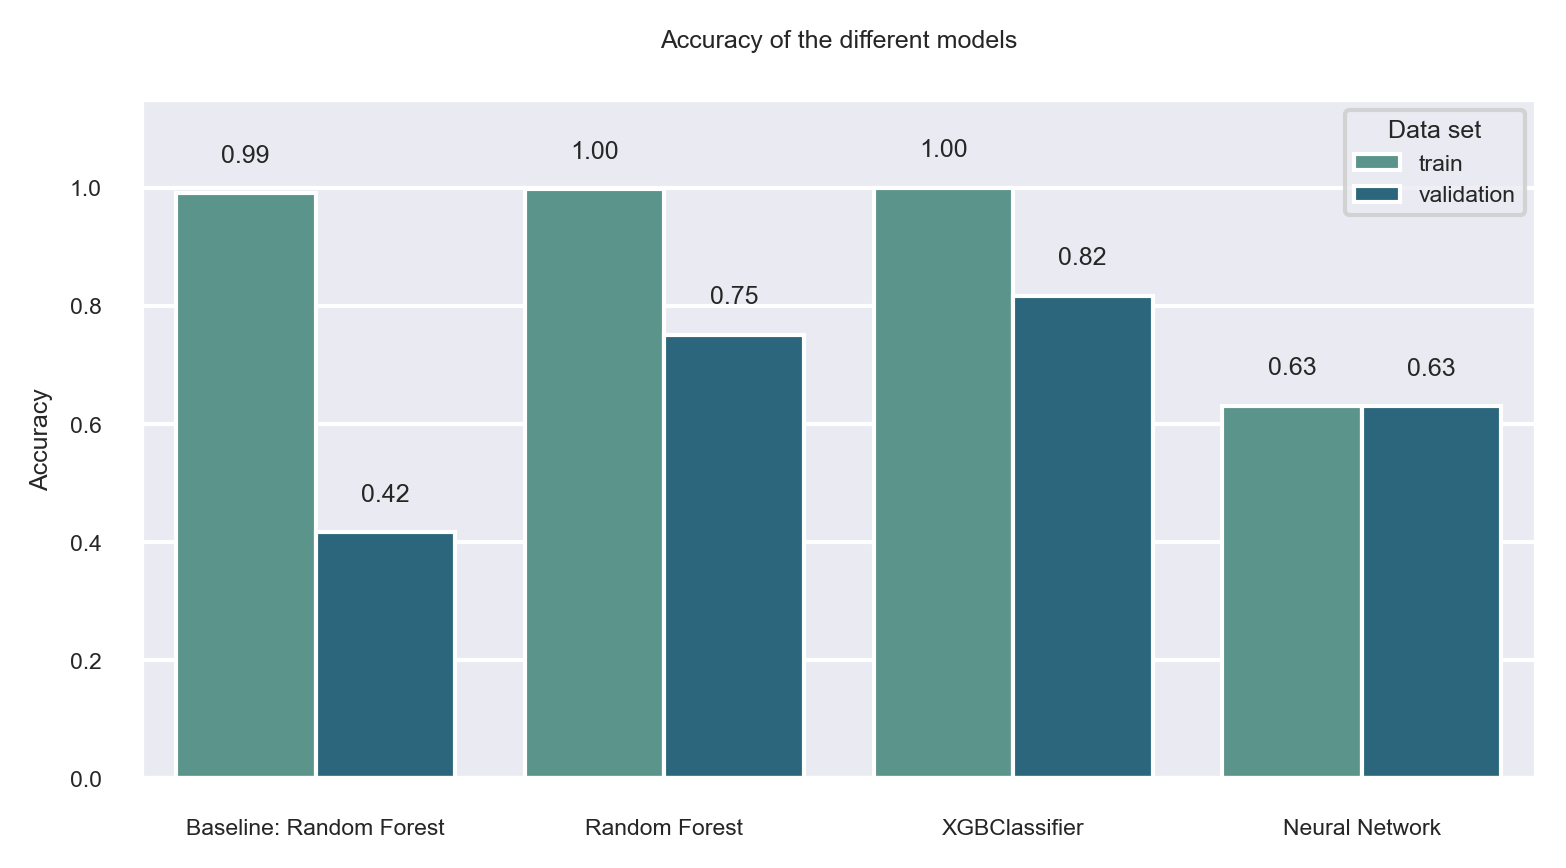

In [34]:
# create a color map for the two data types
cmap = sns.color_palette("crest", 2)
ax = sns.barplot(data=model_accuracy, x="model", y="accuracy", hue="data_typ", palette=cmap)

# do the annotation on each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# set chart labels
ax.set_title('Accuracy of the different models\n')
ax.set_xlabel('')
ax.set_ylabel('Accuracy')

# set the ticket labels
plt.legend(title='Data set')
plt.yticks(rotation=0) 
plt.ylim(0, 1.15)
plt.xticks(rotation=0, horizontalalignment='center')

# display the bar chart of the label accuracies
plt.show()